# Intro

This project conducts a thorough analysis of paleo-present climate data, focusing on the intricate relationship between CO2 levels and temperature anomalies over the past 800,000 years. In addition to this core analysis, the study explores CH4 concentrations, polar ice coverage, and specific climate change signals in the Irish context, referencing the Maynooth study.

Data from various sources are consolidated into a pandas dataframe and exported in CSV and JSON formats for accessibility. The project then analyzes trends, temporal relationships, and leads/lags for all variables. Furthermore, it predicts future global temperature anomalies, comparing the synthesized data to established climate models.

The project concludes by reflecting on accelerated warming trends, leveraging the latest features such as temperature fluctuations and polar ice coverage. This research aims to contribute valuable insights into climate dynamics, fostering discussions about our changing environment.

### Set up

We will first import the libraries we will use :

In [2]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np
import warnings

Next, let's import the historical datasets with data from the past 800000 years:

In [3]:
co2_data = pd.read_csv('data/CO2_per_year.csv')
temperature_data = pd.read_csv('data/temperature.csv')

## Co2 vs Temperature Anomoly

We will now check the Co2 levels historically :

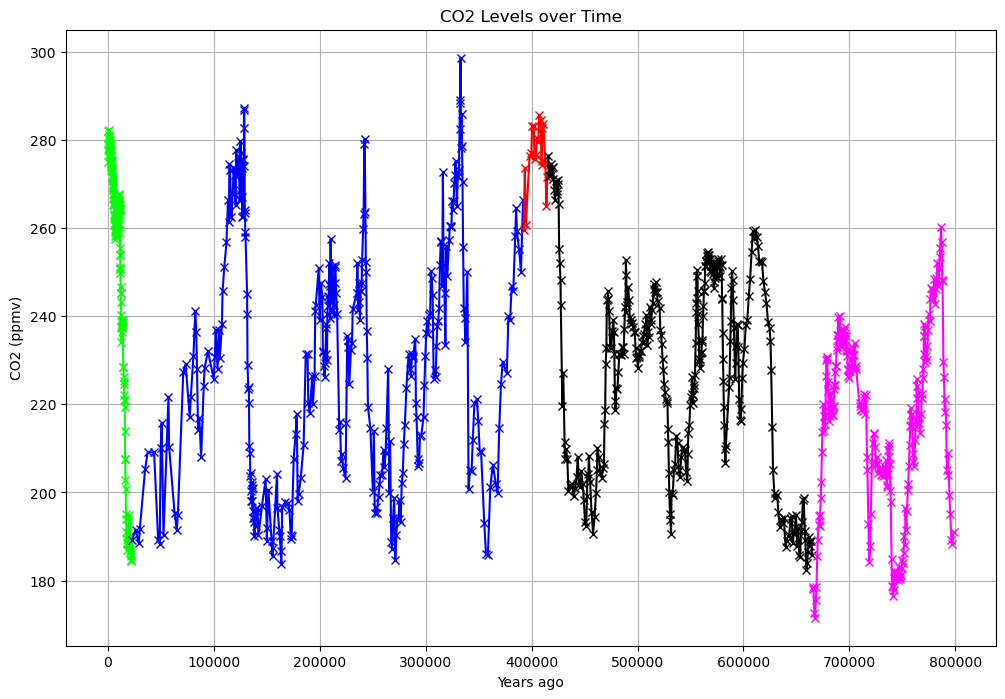

In [4]:
colors = {
    'Dome C (Monnin et al. 2001) measured at University of Bern': 'lime',
    'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble': 'blue',
    'Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble':'red',
    'Dome C (Siegenthaler et al. 2005)  measured at University of Bern':'black',
    'Dome C (Luethi et al. (sub)) measured at University of Bern':'fuchsia'
}

mplot.figure(figsize=(12, 8))
for source, color in colors.items():
    subset = co2_data[co2_data['source'] == source]
    mplot.plot(subset['EDC3_gas_a (yr)'], subset['CO2 (ppmv)'], marker='x', color=color)

mplot.xlabel('Years ago')
mplot.ylabel('CO2 (ppmv)')
mplot.title('CO2 Levels over Time')
mplot.grid(True)
mplot.show()

We can see a pattern emerge of lows and highs. Next, we will see the temperature over the same time period :

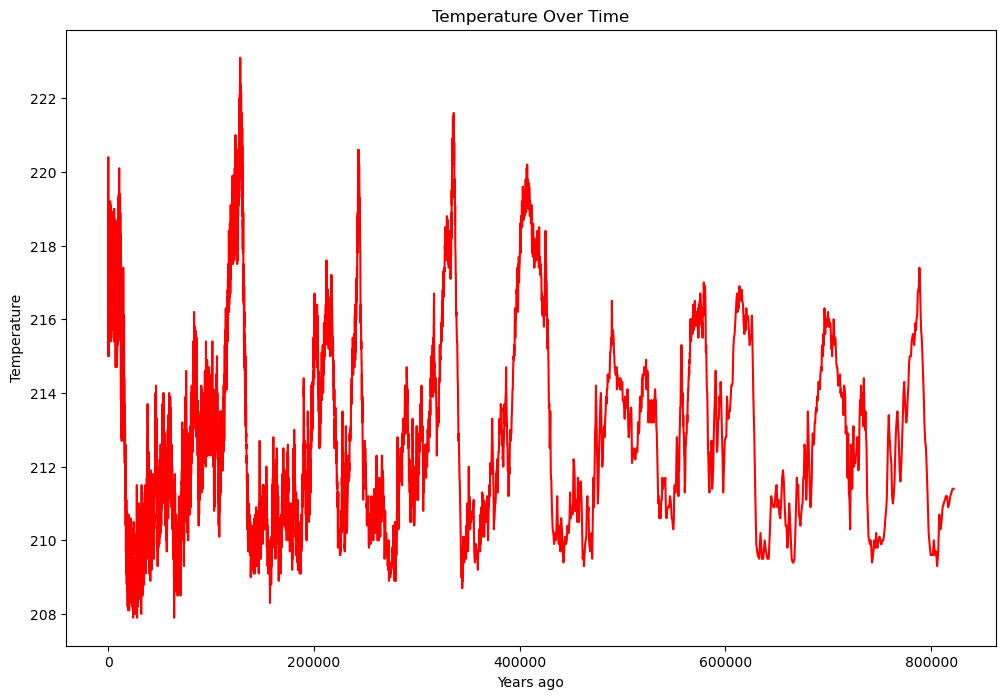

In [5]:
mplot.figure(figsize=(12, 8))

mplot.plot(temperature_data['AICC2012'], temperature_data['temp'], color='red')
mplot.xlabel('Years ago')
mplot.ylabel('Temperature')
mplot.title('Temperature Over Time')
mplot.show()

It appears to follow the a similar pattern of lows and high in intervals. Let's plot them together and see how they line up.

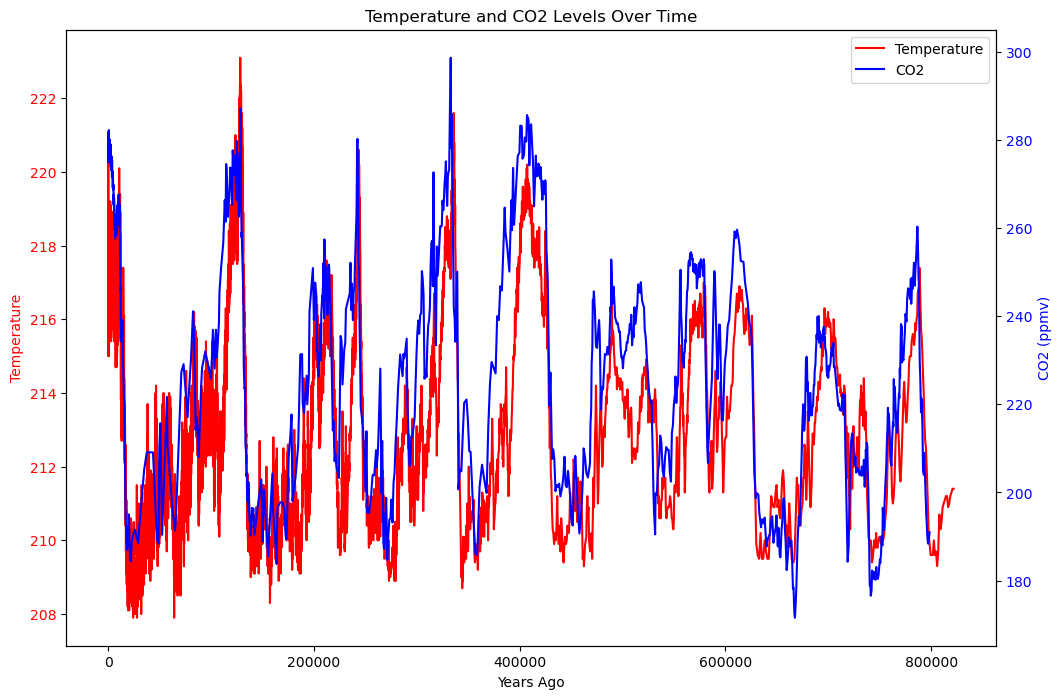

In [6]:
fig, ax1 = mplot.subplots(figsize=(12, 8))

color = 'red'
ax1.plot(temperature_data['AICC2012'], temperature_data['temp'], color=color, label='Temperature')
ax1.set_xlabel('Years Ago')
ax1.set_ylabel('Temperature', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Temperature and CO2 Levels Over Time')

ax2 = ax1.twinx()

color = 'blue'
ax2.plot(co2_data['EDC3_gas_a (yr)'], co2_data['CO2 (ppmv)'], color=color, label='CO2')
ax2.set_ylabel('CO2 (ppmv)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

mplot.show()

There is a strong correlation of high Co2 being linked to high temeprature and vice versa. 

Because of the huge range of years it may be hard to see how the more recent years look. We will investigate that next. Below is the temperature :

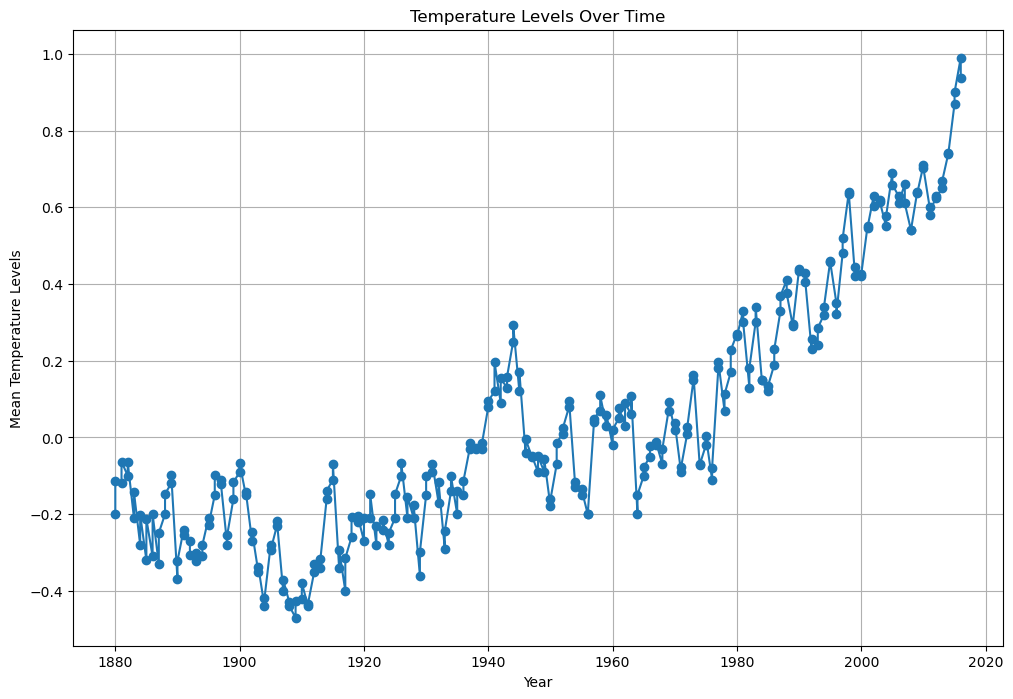

In [7]:
annual_temp = pd.read_csv('data/annual_temp.csv')

mplot.figure(figsize=(12, 8))
mplot.plot(annual_temp['Year'], annual_temp['Mean'], marker='o', linestyle='-') 
mplot.xlabel('Year')
mplot.ylabel('Mean Temperature Levels')
mplot.title('Temperature Levels Over Time')
mplot.grid(True)
mplot.show()

It's increases more rapidly over the past 50 years. Below is a similar time frame for CO2.

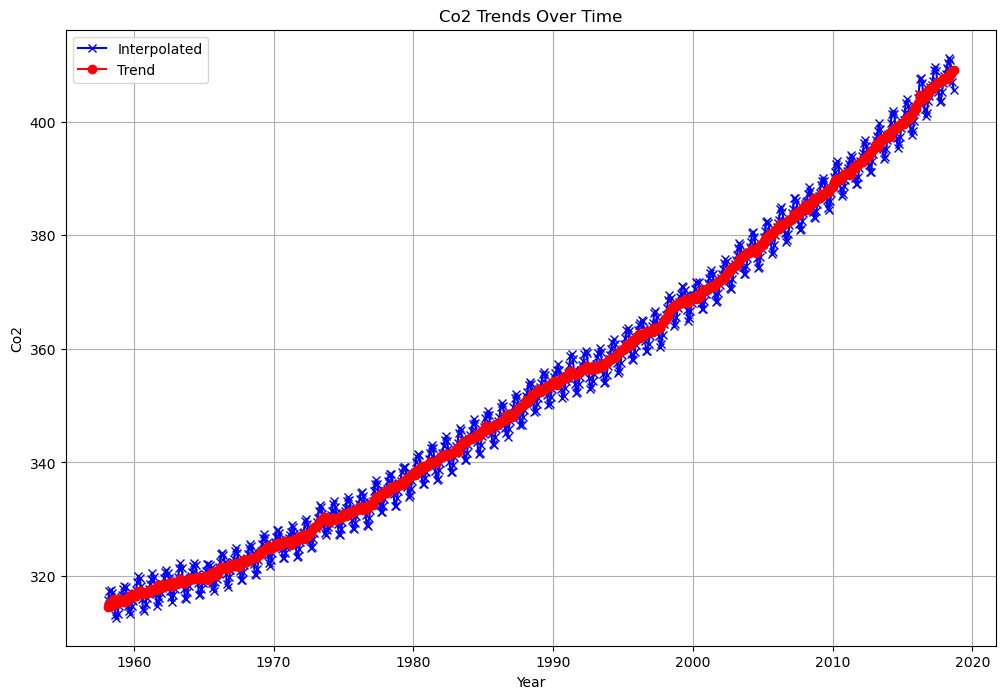

In [9]:
annual_co2 = pd.read_csv('data/co2-mm-mlo_csv.csv')
annual_co2['Date'] = pd.to_datetime(annual_co2['Date'])


mplot.figure(figsize=(12, 8))

mplot.plot(annual_co2['Date'], annual_co2['Interpolated'], marker='x', linestyle='-', label='Interpolated', color='blue')
mplot.plot(annual_co2['Date'], annual_co2['Trend'], marker='o', linestyle='-', label='Trend', color='red')

mplot.xlabel('Year')
mplot.ylabel('Co2')
mplot.title('Co2 Trends Over Time')
mplot.legend()
mplot.grid(True)
mplot.show()

We can see a similar pattern here.

# CH4 - Methane

The relationship between CH4 (methane) and temperature is a key aspect of climate science. Methane is a potent greenhouse gas, meaning it has the ability to trap heat in the Earth's atmosphere. When temperatures rise, such as due to human activities like burning fossil fuels and deforestation, it can lead to increased levels of methane being released into the atmosphere.

This is concerning because methane has a much higher warming potential compared to carbon dioxide over a relatively short time frame. The release of methane can occur from various sources, including wetlands, livestock, and the extraction and use of fossil fuels. As temperatures increase, feedback loops may also be triggered, causing more methane to be released, which further contributes to global warming.

Efforts to mitigate climate change often involve addressing methane emissions alongside other greenhouse gases. This can include better waste management, reducing reliance on fossil fuels, and sustainable agricultural practices to manage livestock-related emissions.

data source = https://gml.noaa.gov/ccgg/trends_ch4/

In [24]:
ch4 = pd.read_csv('data/ch4_mm_gl.csv')

Let's take a quick look at the data: 

In [27]:
ch4.describe()

,year,month,decimal,average,average_unc,trend,trend_unc
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,2003.082988,6.504149,2003.583334,1776.715290,0.908237,1776.749274,0.475311
std,11.613731,3.449213,11.607139,66.687531,1.349340,66.600243,1.277653
min,1983.000000,1.000000,1983.542000,1625.930000,-9.990000,1634.850000,-9.990000
25%,1993.000000,4.000000,1993.562750,1737.867500,0.900000,1736.287500,0.550000
50%,2003.000000,7.000000,2003.583500,1775.490000,1.030000,1774.390000,0.620000
75%,2013.000000,9.000000,2013.604250,1814.772500,1.180000,1813.475000,0.690000
max,2023.000000,12.000000,2023.625000,1924.540000,2.880000,1926.260000,1.450000


This is the how the data looks :

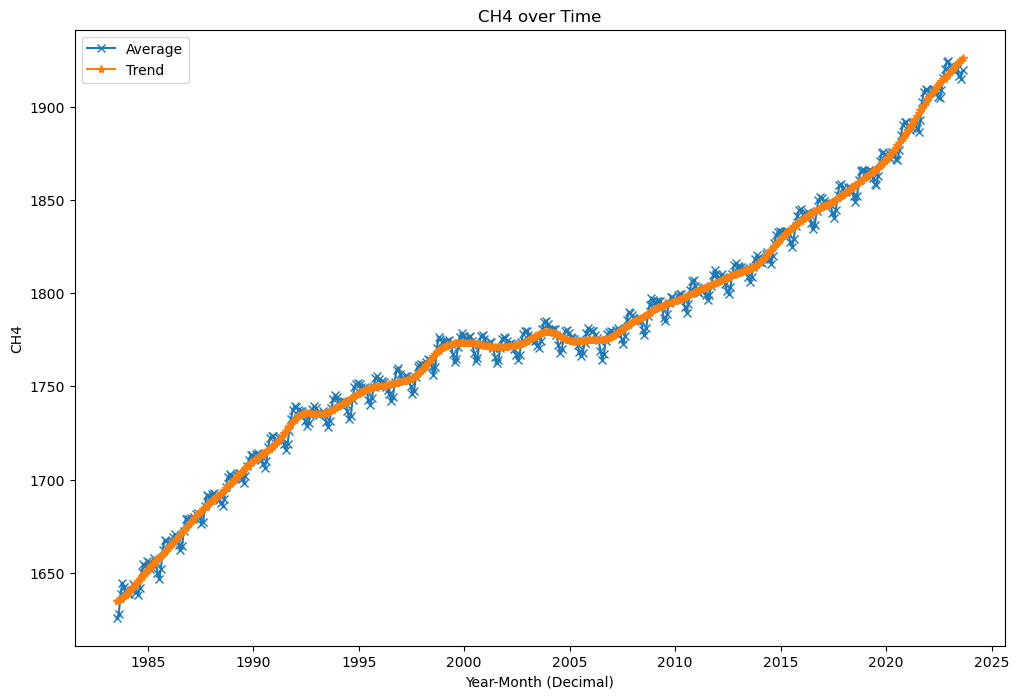

In [18]:
mplot.figure(figsize=(12, 8))

mplot.plot(ch4['decimal'], ch4['average'], label='Average', marker='x')
mplot.plot(ch4['decimal'], ch4['trend'], label='Trend', marker='*')

mplot.xlabel('Year-Month (Decimal)')
mplot.ylabel('CH4')
mplot.title('CH4 over Time')
mplot.legend()

mplot.show()

The rapidly increasing trend is in lin with what we saw with recent temperature and CO2 patterns.

# Irish Weather Data

In [22]:
# irish data: https://www.met.ie/climate/available-data/long-term-data-sets/
birr_weather = pd.read_csv('irish_weather_data\Birr-Castle-second-order-station_1872-1911.csv')
belmullet_weather = pd.read_csv('irish_weather_data\Blacksod-Point_Belmullet_1872-1920.csv')
botanic_weather = pd.read_csv('irish_weather_data/Botanic-Gardens-Dublin-NLI-series_1882-1952.csv')
galway_weather = pd.read_csv('irish_weather_data/NUI-Galway_1851-1965.csv')
pheonix_park_weather = pd.read_csv('irish_weather_data/Phoenix-Park-Dublin_1831-1958.csv')

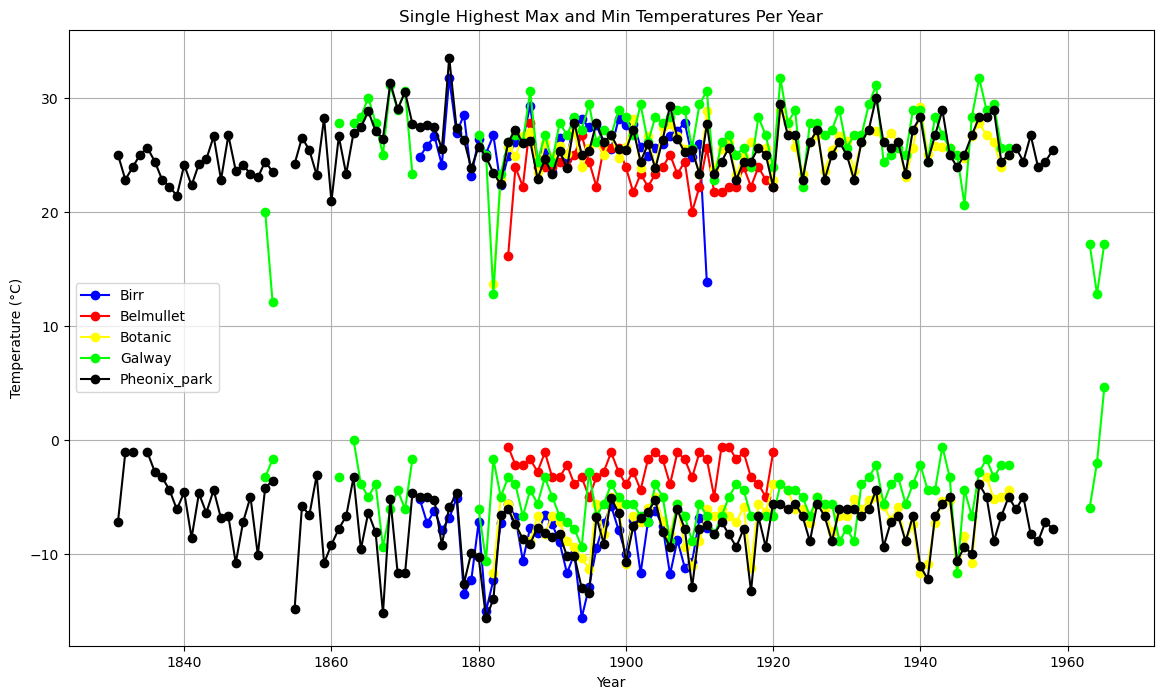

In [23]:
def plot_max_min_temperatures(df, location_name, color):
    max_per_year = df.groupby('Year')['Max (C)'].max()
    min_per_year = df.groupby('Year')['Min (C)'].min()

    # Create a DataFrame with the highest max and min per year
    df_max_min_per_year = pd.DataFrame({'Year': max_per_year.index, 'Max (C)': max_per_year.values, 'Min (C)': min_per_year.values})

    # Plotting
    mplot.plot(df_max_min_per_year['Year'], df_max_min_per_year['Max (C)'], label=f'{location_name}', marker='o', color=color)
    mplot.plot(df_max_min_per_year['Year'], df_max_min_per_year['Min (C)'], marker='o', color=color)


mplot.figure(figsize=(14, 8))

plot_max_min_temperatures(birr_weather, 'Birr', 'blue')
plot_max_min_temperatures(belmullet_weather, 'Belmullet', 'red')
plot_max_min_temperatures(botanic_weather, 'Botanic', 'yellow')
plot_max_min_temperatures(galway_weather, 'Galway', 'lime')
plot_max_min_temperatures(pheonix_park_weather, 'Pheonix_park', 'black')


mplot.legend()

mplot.title('Single Highest Max and Min Temperatures Per Year')
mplot.xlabel('Year')
mplot.ylabel('Temperature (°C)')
mplot.grid(True)
mplot.show()